## Predicting Customer Churn: A Machine Learning Approach 

This report outlines the process of building a logistic regression model to predict customer churn. We'll start by working with the original, imbalanced data, and then explore resampling techniques (upsampling and downsampling) to address the class imbalance and observe the impact on model performance. 

In [ ]:
## Data Preparation and Initial Model 

Following the provided instructions, the Customer-Churn (1).csv dataset was loaded and prepared for modeling. The TotalCharges column, initially of object type, was converted to a numeric format, and the few missing values in this column were filled with the column's mean.

A logistic regression model was trained using the features: tenure, SeniorCitizen, MonthlyCharges, and TotalCharges. With the original, imbalanced data, the model achieved an accuracy of 79.37% on the test set.

In [ ]:
## Addressing Class Imbalance 

A crucial step in classification tasks is to check for class imbalance. In our dataset, the distribution of the 'Churn' variable is as follows:

No (Non-churners): 5174

Yes (Churners): 1869

This shows a significant imbalance, with many more non-churners than churners. To address this, we employed two common resampling techniques:

Upsampling the Minority Class: We increased the number of churner instances in the training data to match the number of non-churner instances.

Downsampling the Majority Class: We decreased the number of non-churner instances in the training data to match the number of churner instances.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import numpy as np

In [2]:
# Load the dataset
churnData = pd.read_csv('Customer-Churn (1).csv')

In [3]:
# Convert 'TotalCharges' to numeric and handle missing values
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData['TotalCharges'].fillna(churnData['TotalCharges'].mean(), inplace=True)

In [4]:
# Convert 'Churn' to numeric
churnData['Churn'] = churnData['Churn'].map({'Yes': 1, 'No': 0})

# Define features and target
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'
X = churnData[features]
y = churnData[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
# Logistic Regression on imbalanced data
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_imbalanced = accuracy_score(y_test, y_pred)
print(f"Accuracy on imbalanced data: {accuracy_imbalanced:.4f}")

# Check class imbalance
print("\nClass distribution:")
print(churnData['Churn'].value_counts())

Accuracy on imbalanced data: 0.7937

Class distribution:
0    5174
1    1869
Name: Churn, dtype: int64


In [ ]:
## Model Performance with Resampling 

After applying these resampling strategies, we trained and evaluated new logistic regression models. The accuracies on the respective test sets were:

Accuracy on upsampled data: 73.14%

Accuracy on downsampled data: 74.24%

It's interesting to note that while resampling techniques are crucial for creating a model that is not biased towards the majority class, they don't always lead to a higher overall accuracy. In this case, the accuracy is slightly lower. However, the models trained on balanced data are likely to be better at correctly identifying the minority class (customers who churn), which is often the primary goal in such problems, as it helps in targeted customer retention efforts.

In [6]:
# Upsampling
majority = churnData[churnData.Churn == 0]
minority = churnData[churnData.Churn == 1]

minority_upsampled = resample(minority,
                                 replace=True,
                                 n_samples=len(majority),
                                 random_state=42)

upsampled_data = pd.concat([majority, minority_upsampled])
print("\nClass distribution after upsampling:")
print(upsampled_data.Churn.value_counts())

X_upsampled = upsampled_data[features]
y_upsampled = upsampled_data[target]
X_upsampled_scaled = scaler.fit_transform(X_upsampled)
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_upsampled_scaled, y_upsampled, test_size=0.3, random_state=42)

log_reg_upsampled = LogisticRegression(random_state=42)
log_reg_upsampled.fit(X_train_up, y_train_up)
y_pred_up = log_reg_upsampled.predict(X_test_up)
accuracy_upsampled = accuracy_score(y_test_up, y_pred_up)
print(f"Accuracy on upsampled data: {accuracy_upsampled:.4f}")


Class distribution after upsampling:
0    5174
1    5174
Name: Churn, dtype: int64
Accuracy on upsampled data: 0.7314


In [7]:
# Downsampling
majority_downsampled = resample(majority,
                                 replace=False,
                                 n_samples=len(minority),
                                 random_state=42)

downsampled_data = pd.concat([majority_downsampled, minority])
print("\nClass distribution after downsampling:")
print(downsampled_data.Churn.value_counts())

X_downsampled = downsampled_data[features]
y_downsampled = downsampled_data[target]
X_downsampled_scaled = scaler.fit_transform(X_downsampled)
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_downsampled_scaled, y_downsampled, test_size=0.3, random_state=42)



Class distribution after downsampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [8]:
log_reg_downsampled = LogisticRegression(random_state=42)
log_reg_downsampled.fit(X_train_down, y_train_down)
y_pred_down = log_reg_downsampled.predict(X_test_down)
accuracy_downsampled = accuracy_score(y_test_down, y_pred_down)
print(f"Accuracy on downsampled data: {accuracy_downsampled:.4f}")

Accuracy on downsampled data: 0.7424


In [12]:
## Data visualization 

Dataset 'Customer-Churn (1).csv' loaded successfully.


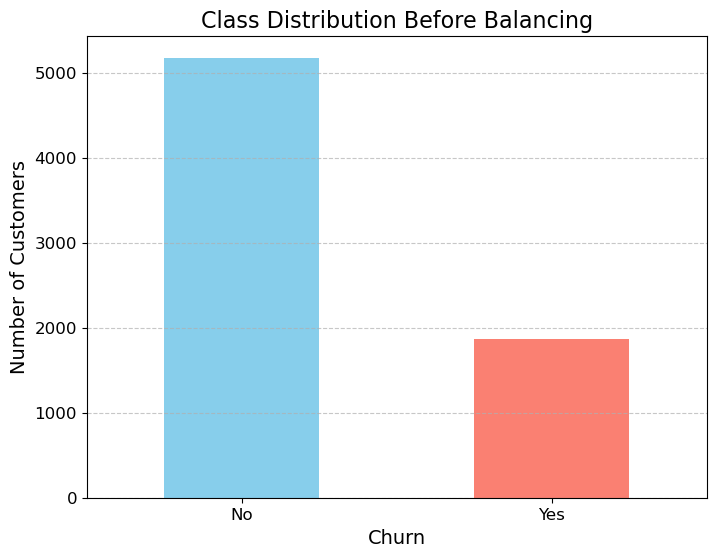


Displayed: Class Distribution Before Balancing

Original Majority Class (No Churn): 5174 records
Original Minority Class (Churn): 1869 records


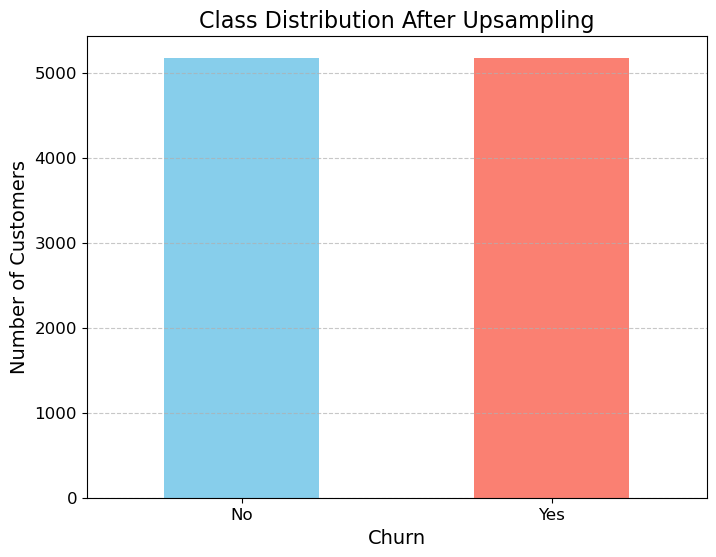


Displayed: Class Distribution After Upsampling
Upsampled Data - No Churn: 5174 records
Upsampled Data - Churn: 5174 records


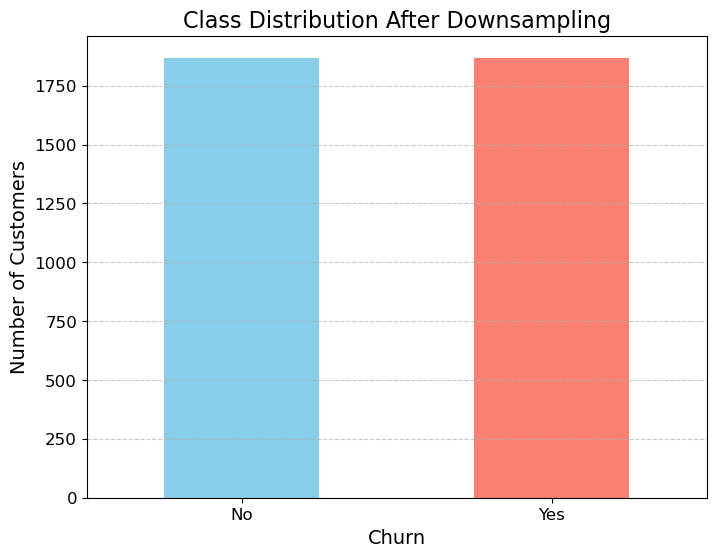


Displayed: Class Distribution After Downsampling
Downsampled Data - No Churn: 1869 records
Downsampled Data - Churn: 1869 records


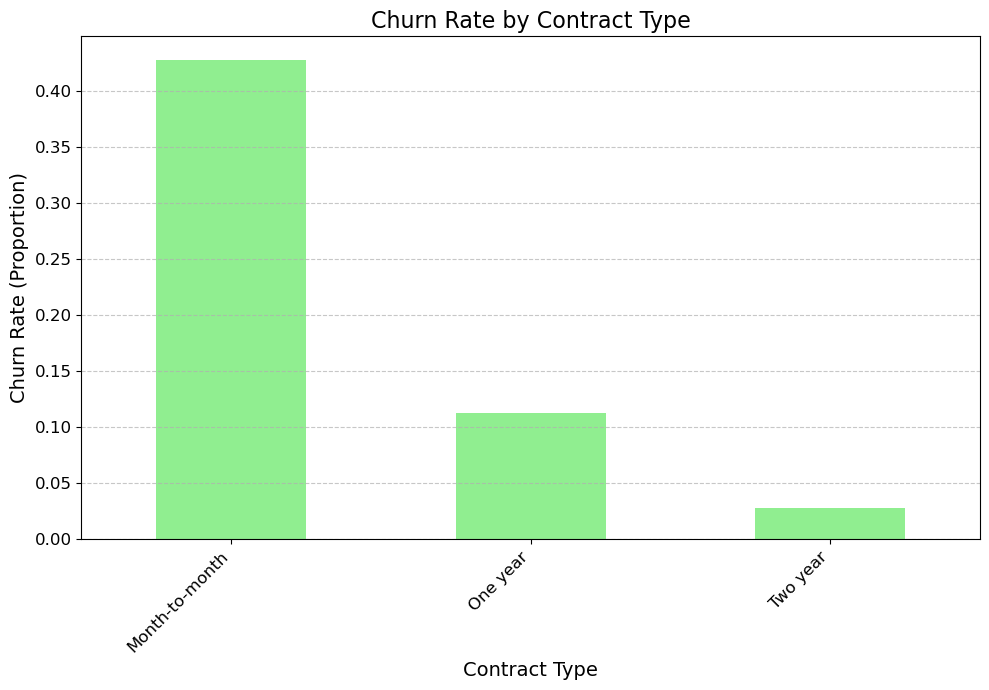


Displayed: Churn Rate by Contract Type


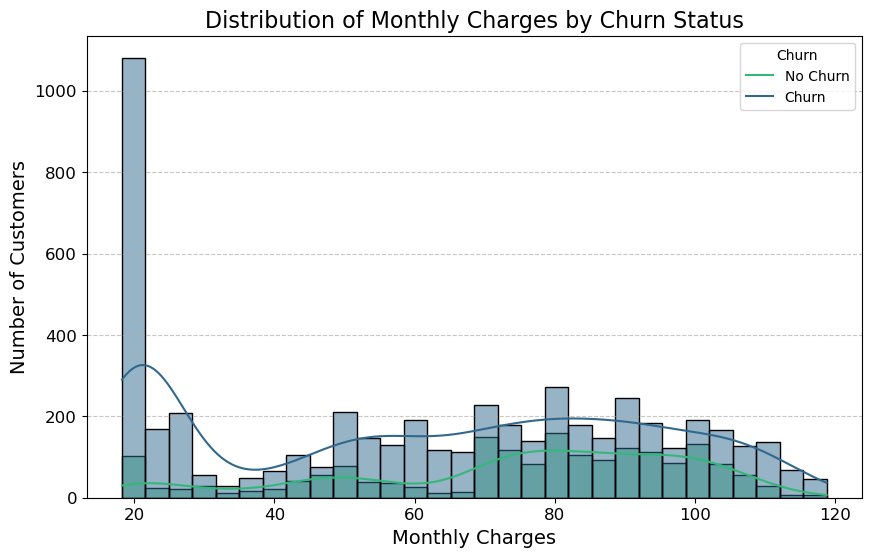


Displayed: Distribution of Monthly Charges by Churn Status


In [16]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn for enhanced visualizations

# Load the dataset
# IMPORTANT: Ensure 'Customer-Churn (1).csv' is in the same directory as your Jupyter Notebook
try:
    churnData = pd.read_csv('Customer-Churn (1).csv')
    print("Dataset 'Customer-Churn (1).csv' loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'Customer-Churn (1).csv' was not found.")
    print("Please ensure it is in the same directory as your Jupyter Notebook,")
    print("or provide the full path to the file.")
    exit() # Exit if the file is not found, as subsequent operations depend on it

# --- Initial Data Preprocessing for Churn Column ---
# Convert 'Churn' to numeric (0 and 1) early for consistent use in plots and resampling
# This mapping is crucial for calculating churn rates and for resampling
churnData['Churn'] = churnData['Churn'].map({'Yes': 1, 'No': 0})

# --- Chart for Imbalanced Data (Original Class Distribution) ---
plt.figure(figsize=(8, 6))
churnData['Churn'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution Before Balancing', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()
print("\nDisplayed: Class Distribution Before Balancing")

# --- Data Preparation for Resampling ---
# Separate the majority and minority classes based on the numeric 'Churn' value
majority = churnData[churnData.Churn == 0] # Customers who did NOT churn
minority = churnData[churnData.Churn == 1] # Customers who DID churn

print(f"\nOriginal Majority Class (No Churn): {len(majority)} records")
print(f"Original Minority Class (Churn): {len(minority)} records")

# --- Upsampling and Chart Generation ---
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)
upsampled_data = pd.concat([majority, minority_upsampled])

plt.figure(figsize=(8, 6))
upsampled_data['Churn'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After Upsampling', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()
print("\nDisplayed: Class Distribution After Upsampling")
print(f"Upsampled Data - No Churn: {upsampled_data['Churn'].value_counts().get(0, 0)} records")
print(f"Upsampled Data - Churn: {upsampled_data['Churn'].value_counts().get(1, 0)} records")

# --- Downsampling and Chart Generation ---
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)
downsampled_data = pd.concat([majority_downsampled, minority])

plt.figure(figsize=(8, 6))
downsampled_data['Churn'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After Downsampling', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()
print("\nDisplayed: Class Distribution After Downsampling")
print(f"Downsampled Data - No Churn: {downsampled_data['Churn'].value_counts().get(0, 0)} records")
print(f"Downsampled Data - Churn: {downsampled_data['Churn'].value_counts().get(1, 0)} records")

# --- NEW CHART 1: Churn Rate by Contract Type ---
# Check if 'Contract' column exists before plotting
if 'Contract' in churnData.columns:
    plt.figure(figsize=(10, 7))
    # Calculate churn rate for each contract type
    # Group by 'Contract' and calculate the mean of 'Churn' (since Churn is 0/1, mean gives proportion)
    churn_by_contract = churnData.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
    churn_by_contract.plot(kind='bar', color='lightgreen')

    plt.title('Churn Rate by Contract Type', fontsize=16)
    plt.xlabel('Contract Type', fontsize=14)
    plt.ylabel('Churn Rate (Proportion)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate labels for better readability
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
    plt.close()
    print("\nDisplayed: Churn Rate by Contract Type")
else:
    print("\n'Contract' column not found in the dataset. Skipping 'Churn Rate by Contract Type' chart.")


# --- NEW CHART 2: Distribution of Monthly Charges by Churn Status ---
# Check if 'MonthlyCharges' column exists and is numeric before plotting
if 'MonthlyCharges' in churnData.columns and pd.api.types.is_numeric_dtype(churnData['MonthlyCharges']):
    plt.figure(figsize=(10, 6))
    # Use seaborn's histplot for better visualization of distributions
    sns.histplot(data=churnData, x='MonthlyCharges', hue='Churn', kde=True, palette='viridis', bins=30)

    plt.title('Distribution of Monthly Charges by Churn Status', fontsize=16)
    plt.xlabel('Monthly Charges', fontsize=14)
    plt.ylabel('Number of Customers', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Churn', labels=['No Churn', 'Churn']) # Add a legend
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    plt.close()
    print("\nDisplayed: Distribution of Monthly Charges by Churn Status")
else:
    print("\n'MonthlyCharges' column not found or is not numeric. Skipping 'Distribution of Monthly Charges' chart.")

